In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -q -y -c weinbe58 quspin

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - quspin


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.5.7   |       hbcca054_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    cudatoolkit-11.8.0         |      h37601d7_11       635.9 MB  conda-forge
    dill-0.3.6                 |     pyhd8ed1ab_1          81 KB  conda-forge
    gmp-6.2.1                  |       h58526e2_0         806 KB  conda-forge
    gmpy2-2.1.2                |  py310h3ec546c_1         215 KB  conda-forge
    joblib-1.3.0  

In [ ]:
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_1d
import numpy as np # general math functions
import scipy.sparse.linalg
import matplotlib.pyplot as plt

In [ ]:
def calc_gs(gzxz,gzz,gx,L):
#    basis = spin_basis_1d(L=L,Nup==L//2,a=1,pauli=1,kblock=0,pblock=1)
    basis = spin_basis_1d(L=L,a=1,pauli=1)
    gzxzs =[[+gzxz,(i-1)%L,i,(i+1)%L] for i in range(L)]
    gzzs =[[-gzz,i,(i+1)%L] for i in range(L)]
    gxs = [[-gx,i] for i in range(L)]
    static = [["zxz",gzxzs],["zz",gzzs],["x",gxs]]
    no_checks = dict(check_symm=False, check_pcon=False, check_herm=False)
    H = hamiltonian(static,[],static_fmt="csr",basis=basis,dtype=np.float64,**no_checks)
    ene, vec = H.eigsh(time=0.0,which="SA",k=2)
    vec = vec[:,0]
    return ene, vec

In [ ]:
def main(L):
#    args = parse_args()
#    L = args.L
#    gzxz = args.gzxz
#    gzz = args.gzz
#    gx = args.gx
    dat = []
    gs = np.linspace(-1,1,33)
    for g in gs:
        gzxz = (g-1)**2
        gzz = 2*(1-g**2)
        gx = (1+g)**2
        ene, vec = calc_gs(gzxz,gzz,gx,L)
        print(g,*ene/L,vec)
        dat.append([g,*ene/L])
        #print(vec)
#    np.savetxt("dat_L"+"{}".format(L),dat)
    return np.array(dat)

In [ ]:
L = 10
dat = main(L)

-1.0 -3.999999999999998 -3.200000000000002 [ 0.03125 -0.03125 -0.03125 ... -0.03125 -0.03125  0.03125]
-0.9375 -3.757812499999999 -3.0546875000000044 [-0.03662616  0.03433703  0.03433703 ...  0.03433703  0.03433703
 -0.03662616]
-0.875 -3.531249999999999 -2.9187500000000037 [-0.04315128  0.03775737  0.03775737 ...  0.03775737  0.03775737
 -0.04315128]
-0.8125 -3.320312499999998 -2.7921874999999945 [ 0.05112225 -0.04153682 -0.04153682 ... -0.04153682 -0.04153682
  0.05112225]
-0.75 -3.125000000000006 -2.6750000000000083 [ 0.06092699 -0.04569525 -0.04569525 ... -0.04569525 -0.04569525
  0.06092699]
-0.6875 -2.9453124999999973 -2.5671874999999895 [-0.07307706  0.05024048  0.05024048 ...  0.05024048  0.05024048
 -0.07307706]
-0.625 -2.781250000000001 -2.46875 [ 0.08825373 -0.05515858 -0.05515858 ... -0.05515858 -0.05515858
  0.08825373]
-0.5625 -2.632812500000001 -2.3796875000000024 [-0.10737402  0.06039789  0.06039789 ...  0.06039789  0.06039789
 -0.10737402]
-0.5 -2.5 -2.3000000000000065

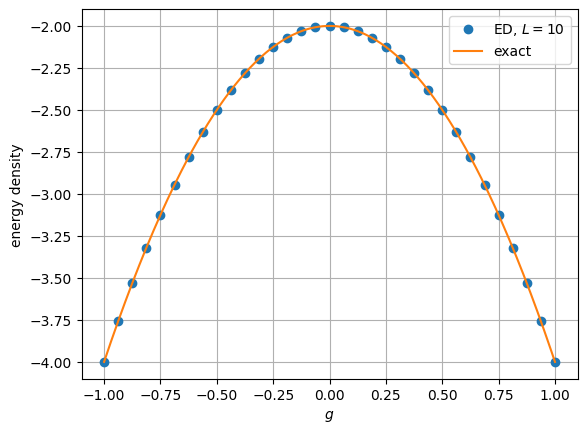

In [ ]:
def ene_exact(x):
  return -2*(x**2+1)
xx = np.linspace(-1,1,257)
yy = ene_exact(xx)

plt.grid()
plt.xlabel(r"$g$")
plt.ylabel(r"energy density")
plt.plot(dat[:,0],dat[:,1],"o",label=r"ED, $L=10$")
plt.plot(xx,yy,"-",label=r"exact")
plt.legend()
plt.show()
plt.close()